## circuiti_1

In [1]:
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats 
sys.path.append("D:/Progetti/LabProgram")
from Routine import Routine
from Funnel import Funnel
from Funnel import FunnelSingle
from functions import linear_fit
import lab_utilities as lu

1.444760155819468


In [2]:
#Impost style
lu.setDefaultGraphStyle()

### Parte uno

misura resistenza interna voltometro

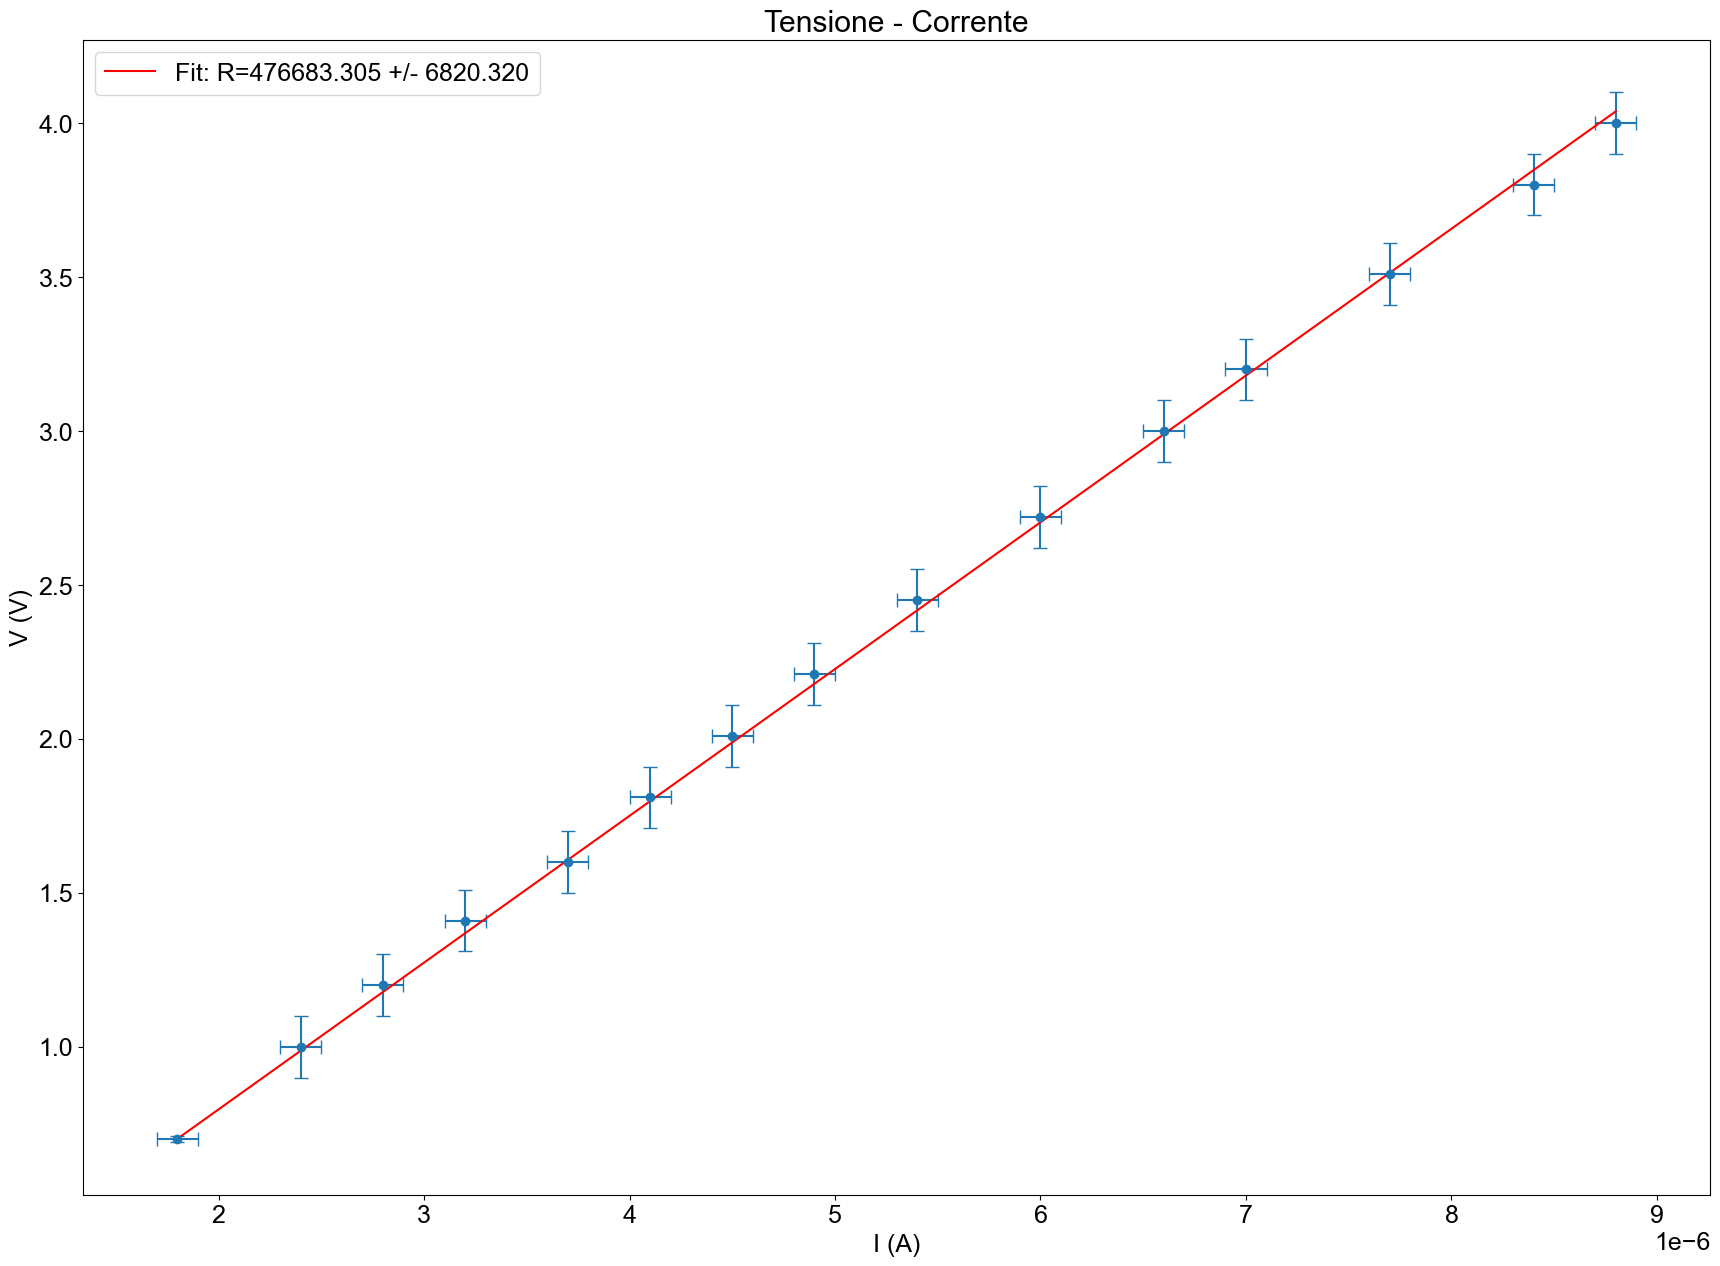

R=476683.305


In [3]:
R_usata = 2.999e6
sigma_R_usata = 0.001e6
datauno = pd.read_csv("data/parte_uno/vmisura_res_volmetro.csv")

V = datauno["V[V]"].values
I = datauno["I[muA]"].values / 1000000
sigma_V = datauno["sigma_V[V]"].values
sigma_I = datauno["sigma_I[muA]"].values / 1000000 # Convert microamps to amps


popt, pcov = curve_fit(linear_fit, I, V, sigma=sigma_V, absolute_sigma=True)

R_eq = popt[0]
delta_R = pcov[0, 0]**0.5
intercept = popt[1]

fit_line = linear_fit(I, R_eq, intercept)

plt.errorbar(I, V, xerr=sigma_I, yerr=sigma_V, fmt="o")
plt.plot(I, fit_line, color="red", label=f"Fit: R={R_eq:.3f} +/- {delta_R:.3f}")
plt.xlabel("I (A)")
plt.ylabel("V (V)")
plt.title("Tensione - Corrente")
plt.legend()
plt.show()

print(f"R={R_eq:.3f}")

In [4]:
#Resistenza Generatore
#R_V = 1/(1/R_eq - 1/R_usata)
R_V = (R_eq * R_usata) / (R_usata - R_eq)
print(f"R Voltometro={R_V/1000:.3f} kOhm")

R Voltometro=566.770 kOhm


In [5]:
#Calcolo giusto con solo un dato
R_usata_2 = 1.400e6
V_misurato = 2.864
sigma_V_misurato = 0.005
I_misurata = 2.6e-6
sigma_I_misurata = 0.5e-6
R_Vrut = Routine("V/I")
R_vFunnel = FunnelSingle((['V', 'I'],[V_misurato, I_misurata],['s_V', 's_I'],[sigma_V_misurato, sigma_I_misurata]), R_Vrut)
R_vFunnel.prepare_data()
R_Volt, R_Volt_error, R_Volt_error_formula = R_vFunnel.run_routine()

test = Routine('(R_e * R_u) / (R_u - R_e)')
test_funnel = FunnelSingle([['R_e', 'R_u'], [R_Volt, R_usata_2], ['s_R_u', 's_R_e'], [0.01e6, R_Volt_error]], test)
test_funnel.prepare_data()
a,b,c = test_funnel.run_routine()
print(f"R Voltometro={a/1000:.3f} +- {b/1000:.3f}kOhm")
print(c)


R Voltometro=5167.010 +- 380.836kOhm
\sigma_{R_eR_e}*(R_e**2*R_u**2/(R_e**4 - 4*R_e**3*R_u + 6*R_e**2*R_u**2 - 4*R_e*R_u**3 + R_u**4) + 2*R_e*R_u**2/(-R_e**3 + 3*R_e**2*R_u - 3*R_e*R_u**2 + R_u**3) + R_u**2/(R_e**2 - 2*R_e*R_u + R_u**2)) + \sigma_{R_uR_u}*(R_e**2*R_u**2/(R_e**4 - 4*R_e**3*R_u + 6*R_e**2*R_u**2 - 4*R_e*R_u**3 + R_u**4) - 2*R_e**2*R_u/(-R_e**3 + 3*R_e**2*R_u - 3*R_e*R_u**2 + R_u**3) + R_e**2/(R_e**2 - 2*R_e*R_u + R_u**2))


In [6]:
print(R_Volt)

1101538.46153846


Misura resistenza interna Amperometro

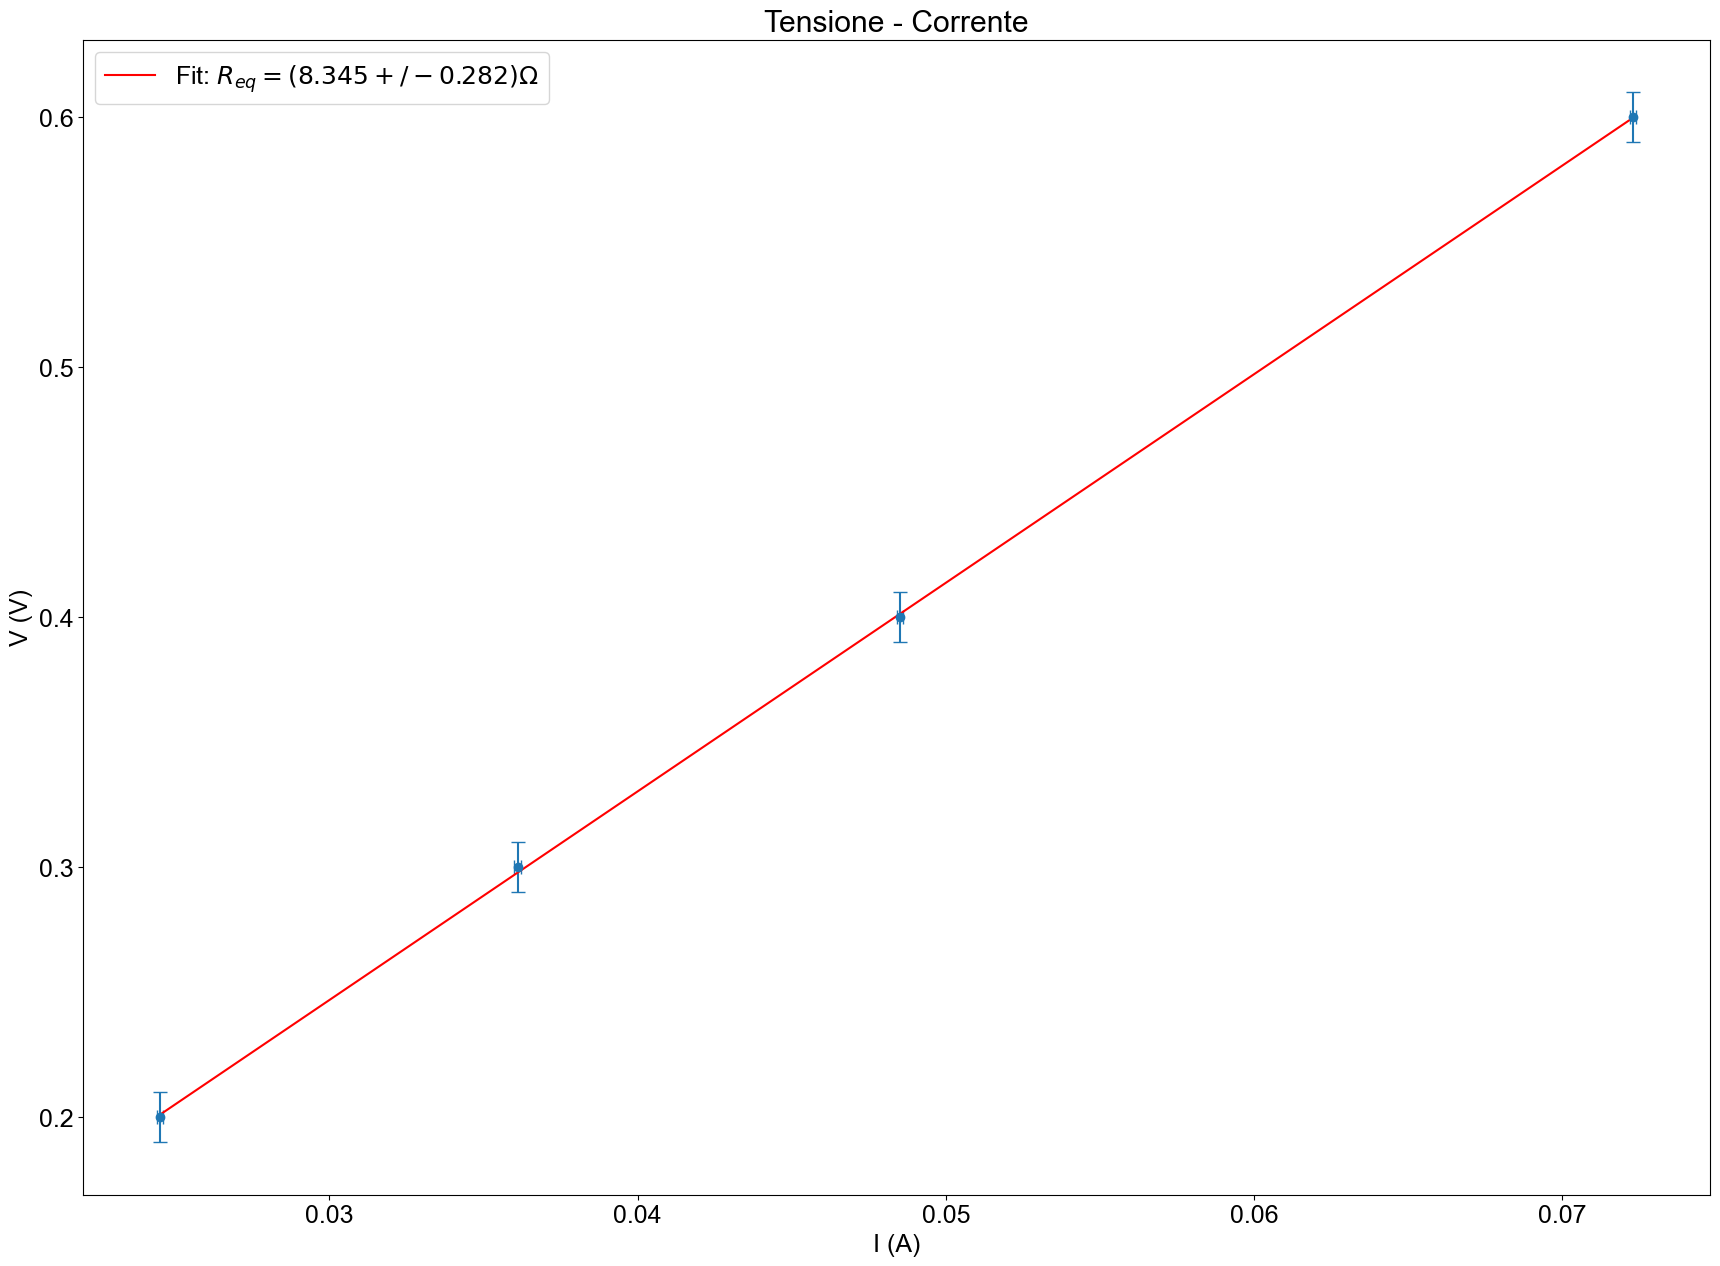

R=8.345


In [7]:
R_2 = 2.7
sigma_R_2 = 0.2

datauno_2 = pd.read_csv("data/parte_uno/misura_res_amperometro.csv")

V = datauno_2["V[V]"].values
I = datauno_2["I[mA]"].values / 1000
sigma_V = datauno_2["sigma_V[V]"].values
sigma_I = datauno_2["sigma_I[mA]"].values / 1000 # Convert microamps to amps


popt, pcov = curve_fit(linear_fit, I, V, sigma=sigma_V, absolute_sigma=True)

R_eq_2 = popt[0]
delta_R_2 = pcov[0, 0]**0.5
intercept_2 = popt[1]

fit_line = linear_fit(I, R_eq_2, intercept_2)

plt.errorbar(I, V, xerr=sigma_I, yerr=sigma_V, fmt="o")
amp_lable = f"Fit: " +r"$R_{eq}"+ f"=({R_eq_2:.3f} +/- {delta_R_2:.3f})" + r"\Omega$"
plt.plot(I, fit_line, color="red", label=amp_lable)
plt.xlabel("I (A)")
plt.ylabel("V (V)")
plt.title("Tensione - Corrente")
plt.legend()
plt.show()

print(f"R={R_eq_2:.3f}")

In [8]:
chisq_amp, prob_amp = lu.chi2_fit_test(fit_line, V, sigma_V, 2)
print(f"Chi^2={chisq_amp:.3f}, p={prob_amp:.3f}")

Chi^2=0.075, p=0.963


In [9]:
#Calcolo R amperometro
R_amp_manual = R_eq_2 - R_2

R_amp = Routine("R_eq - R_u")
R_amp_funnel = FunnelSingle((['R_eq', 'R_u'],[R_eq_2, R_2],['s_R_u', 's_R_eq'],[sigma_R_2, delta_R_2]), R_amp)
R_amp_funnel.prepare_data()
R_amp, R_amp_error, R_amp_error_formula = R_amp_funnel.run_routine()
print(f"R amperometro={R_amp:.3f} +- {R_amp_error:.3f}Ohm")
print(R_amp_error_formula)

print(R_amp)

R amperometro=5.645 +- 0.694Ohm
\sigma_{R_eqR_eq} + \sigma_{R_uR_u}
5.64454160737592


### Verifica legge di Ohm

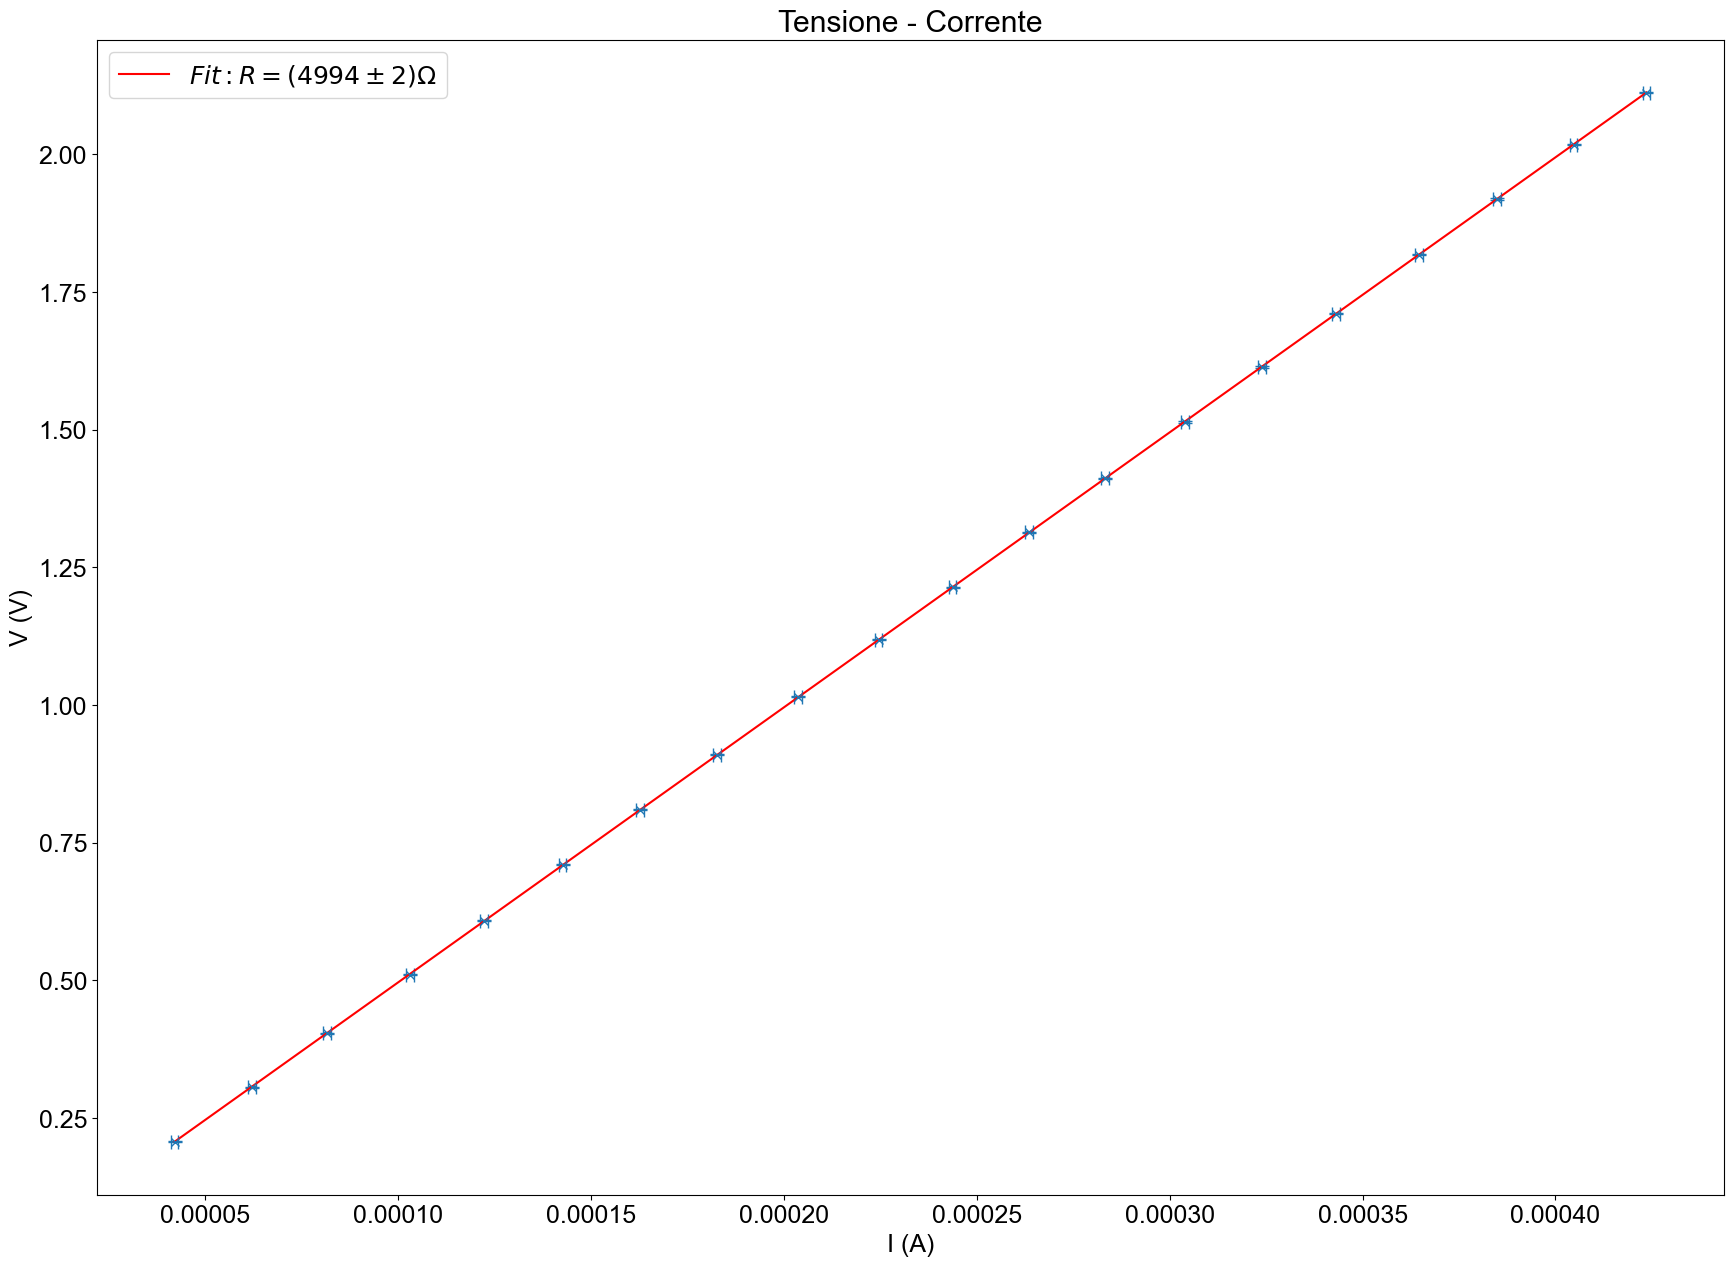

R=4993.783
Chi2=8.816
Prob=96.385%


In [27]:
R_misurata = 4.991e3
sigma_R_mis = 0.002

datauno_3 = pd.read_csv("data/parte_uno/verifica_ohm.csv")

V_3 = datauno_3["V[V]"].values
I_3 = datauno_3["I[muA]"].values / 1000000
sigma_V_3 = datauno_3["sigma_V[V]"].values
sigma_I_3 = datauno_3["sigma_I[muA]"].values / 1000000 # Convert microamps to amps


popt_3, pcov_3 = curve_fit(linear_fit, I_3, V_3, sigma=sigma_V_3, absolute_sigma=True)

R_eq_3 = popt_3[0]
delta_R_3 = pcov_3[0, 0]**0.5
intercept_3 = popt_3[1]

fit_line_3 = linear_fit(I_3, R_eq_3, intercept_3)

dof_ohm = len(V_3)-2
chi_sq_ohm , prob_ohm = lu.chi2_fit_test(fit_line_3, V_3, sigma_V_3, dof_ohm)

plt.errorbar(I_3, V_3, xerr=sigma_I_3, yerr=sigma_V_3, fmt="x")
label_ohm = r"$" + f"Fit: R= ({R_eq_3:.0f}" + r"\pm" + f"{delta_R_3:.0f})" + r"\Omega$"
plt.plot(I_3, fit_line_3, color="red", label=label_ohm)
plt.xlabel("I (A)")
plt.ylabel("V (V)")
plt.title("Tensione - Corrente")
plt.legend()
plt.show()

print(f"R={R_eq_3:.3f}")
print(f"Chi2={chi_sq_ohm:.3f}")
print(f"Prob={prob_ohm*100:.3f}%")

t-test

In [11]:
#check combined error
combined_error = np.sqrt(delta_R_3**2 + sigma_R_mis**2)
diff = abs(R_misurata - R_eq_3)
print(combined_error, diff)

t, p_value = stats.ttest_ind_from_stats(R_eq_3, delta_R_3, 1, R_misurata, sigma_R_mis, 1, equal_var=False)
print(f"t={t:.3f}")
print(f"p={p_value*100:.10f}%")

1.9259647850928285 2.782557183013523
t=1.445
p=nan%


In [12]:
z = lu.z_test(R_eq_3, R_misurata, delta_R_3, sigma_R_mis)
print(f"z={z:.3f}")

z=1.445


### Resistenze in serie e parallelo

#### Parallelo

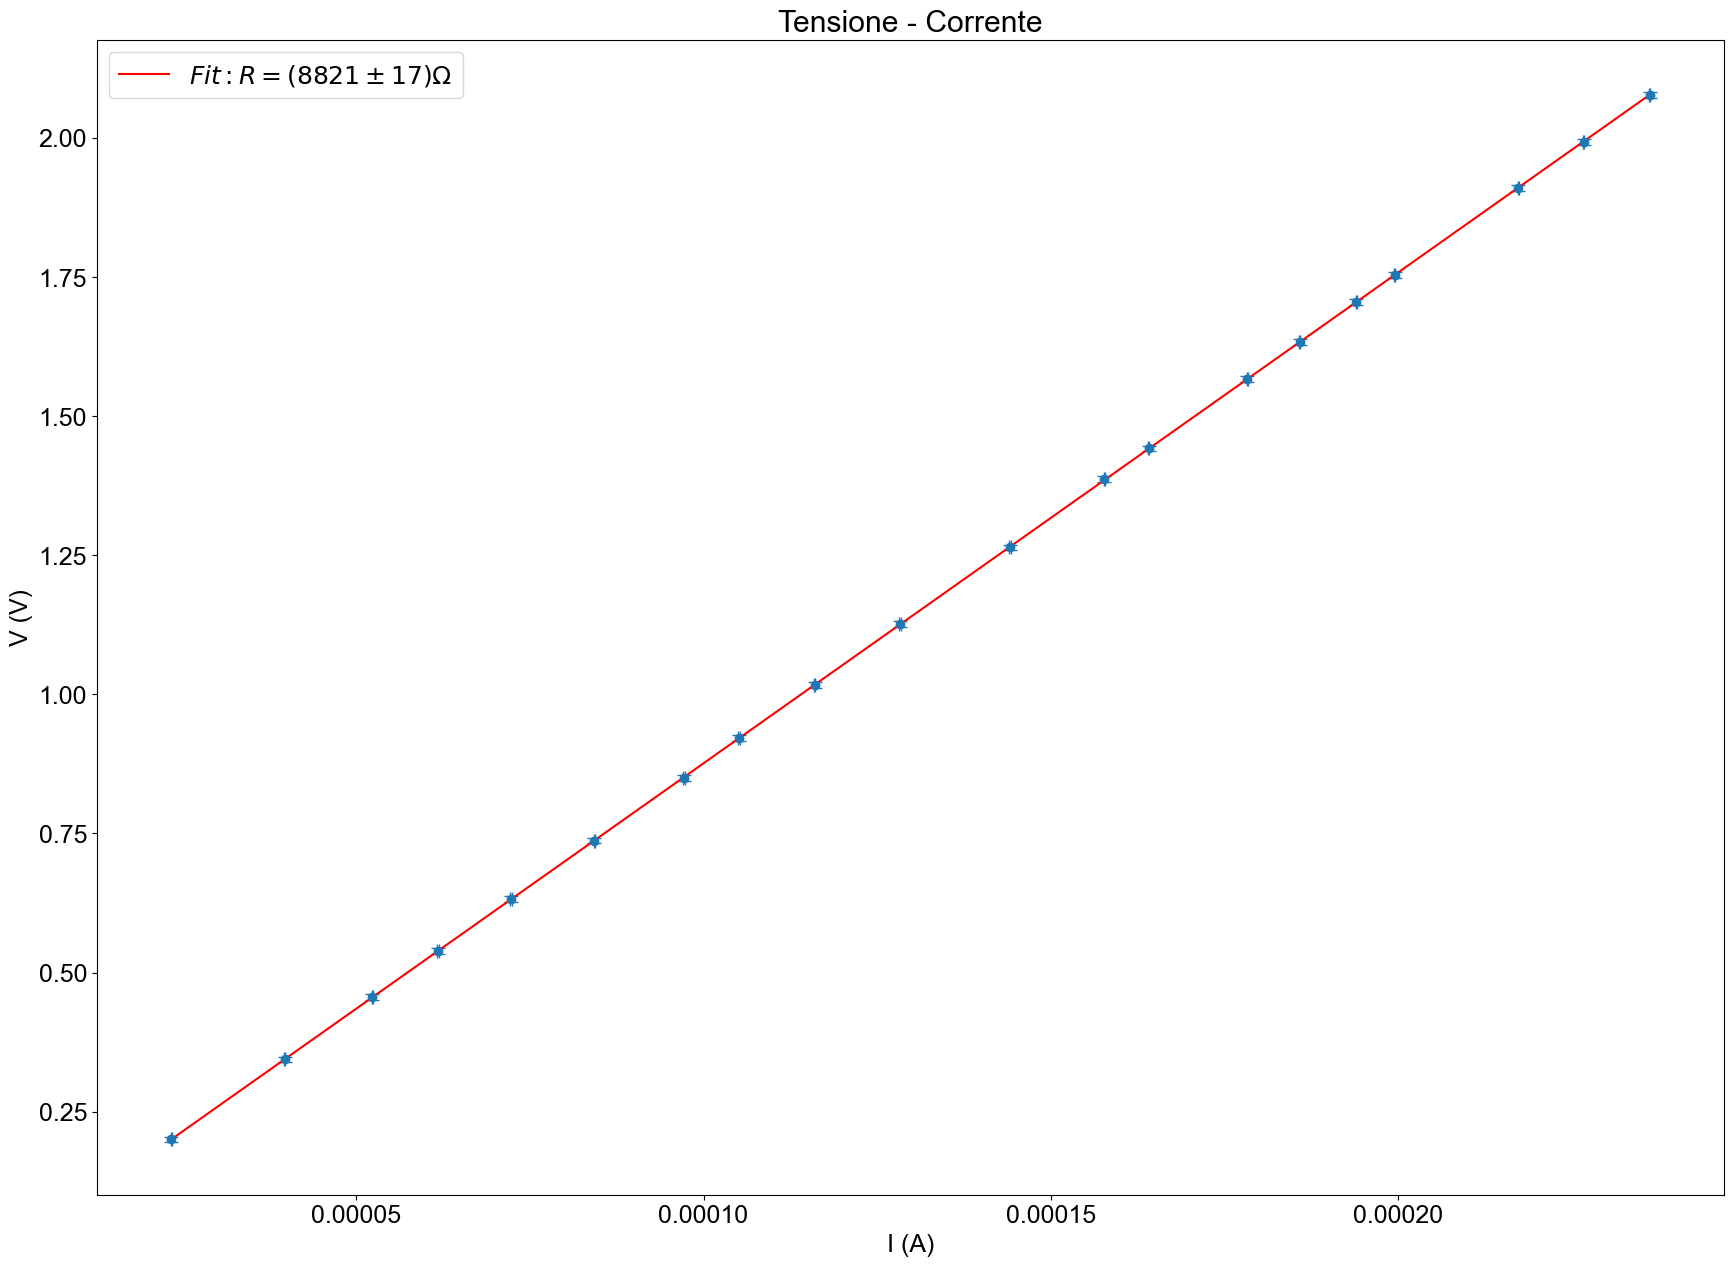

Chi2=0.386
Prob=100.000%
17.46956114905994


In [32]:
R_1 = 21.75*1000
R_2 = 14.81*1000
sigma_Rs = 0.01 * 1000

#Fare fit e confrontare con valore atteso (in parallelo)
data_parallelo = pd.read_csv("data/parte_uno/resistenze_parallelo.csv")

V_p = data_parallelo["V[V]"].values
I_p = data_parallelo["I[muA]"].values / 1e6
sigma_V_p = data_parallelo["sigma_V[V]"].values
sigma_I_p = data_parallelo["sigma_I[muA]"].values / 1e6 # Convert microamps to amps

popt_p, pcov_p = curve_fit(linear_fit, I_p, V_p, sigma=sigma_V_p, absolute_sigma=True)

R_eq_p = popt_p[0]
delta_R_p = pcov_p[0, 0]**0.5
intercept_p = popt_p[1]

fit_line_p = linear_fit(I_p, R_eq_p, intercept_p)

dof_ohm_p = len(V_p)-2
chi_sq_ohm_p , prob_ohm_p = lu.chi2_fit_test(fit_line_p, V_p, sigma_V_p, dof_ohm_p)
#manually calculate chi2
chi_test = np.sum(((V_p - fit_line_p)/sigma_V_p)**2)

plt.errorbar(I_p, V_p, xerr=sigma_I_p, yerr=sigma_V_p, fmt="o")
label_ohm_p = r"$" + f"Fit: R= ({R_eq_p:.0f}" + r"\pm" + f"{delta_R_p:.0f})" + r"\Omega$"
plt.plot(I_p, fit_line_p, color="red", label=label_ohm_p)
plt.xlabel("I (A)")
plt.ylabel("V (V)")
plt.title("Tensione - Corrente")
plt.legend()
plt.show()

print(f"Chi2={chi_sq_ohm_p:.3f}")
print(f"Prob={prob_ohm_p*100:.3f}%")
print(delta_R_p)

In [33]:
#Calcolo R_eq atteso
R_eq_atteso = 1/(1/R_1 + 1/R_2)
print(R_eq_atteso)

#using Funnel
R_eq_att = Routine("1/(1/R_1 + 1/R_2)")
R_eq_att_funnel = FunnelSingle((['R_1', 'R_2'],[R_1, R_2],['s_R_1', 's_R_2'],[sigma_Rs, sigma_Rs]), R_eq_att)
R_eq_att_funnel.prepare_data()
R_eq_atteso, R_eq_atteso_error, R_eq_atteso_error_formula = R_eq_att_funnel.run_routine()
print(f"R_eq_atteso={R_eq_atteso:.3f} +- {R_eq_atteso_error:.3f}Ohm")
print(R_eq_atteso_error_formula)

8810.653719912474
R_eq_atteso=8810.654 +- 1.234Ohm
\sigma_{R_1R_1}/(R_1**4/R_2**4 + 4*R_1**3/R_2**3 + 6*R_1**2/R_2**2 + 4*R_1/R_2 + 1) + \sigma_{R_2R_2}/(1 + 4*R_2/R_1 + 6*R_2**2/R_1**2 + 4*R_2**3/R_1**3 + R_2**4/R_1**4)


In [ ]:
#Convert to latex math expression:

#(R_2^2 * \sigma_{R_1}^2)/(R_1 + R_2)^2 => 

#### Serie

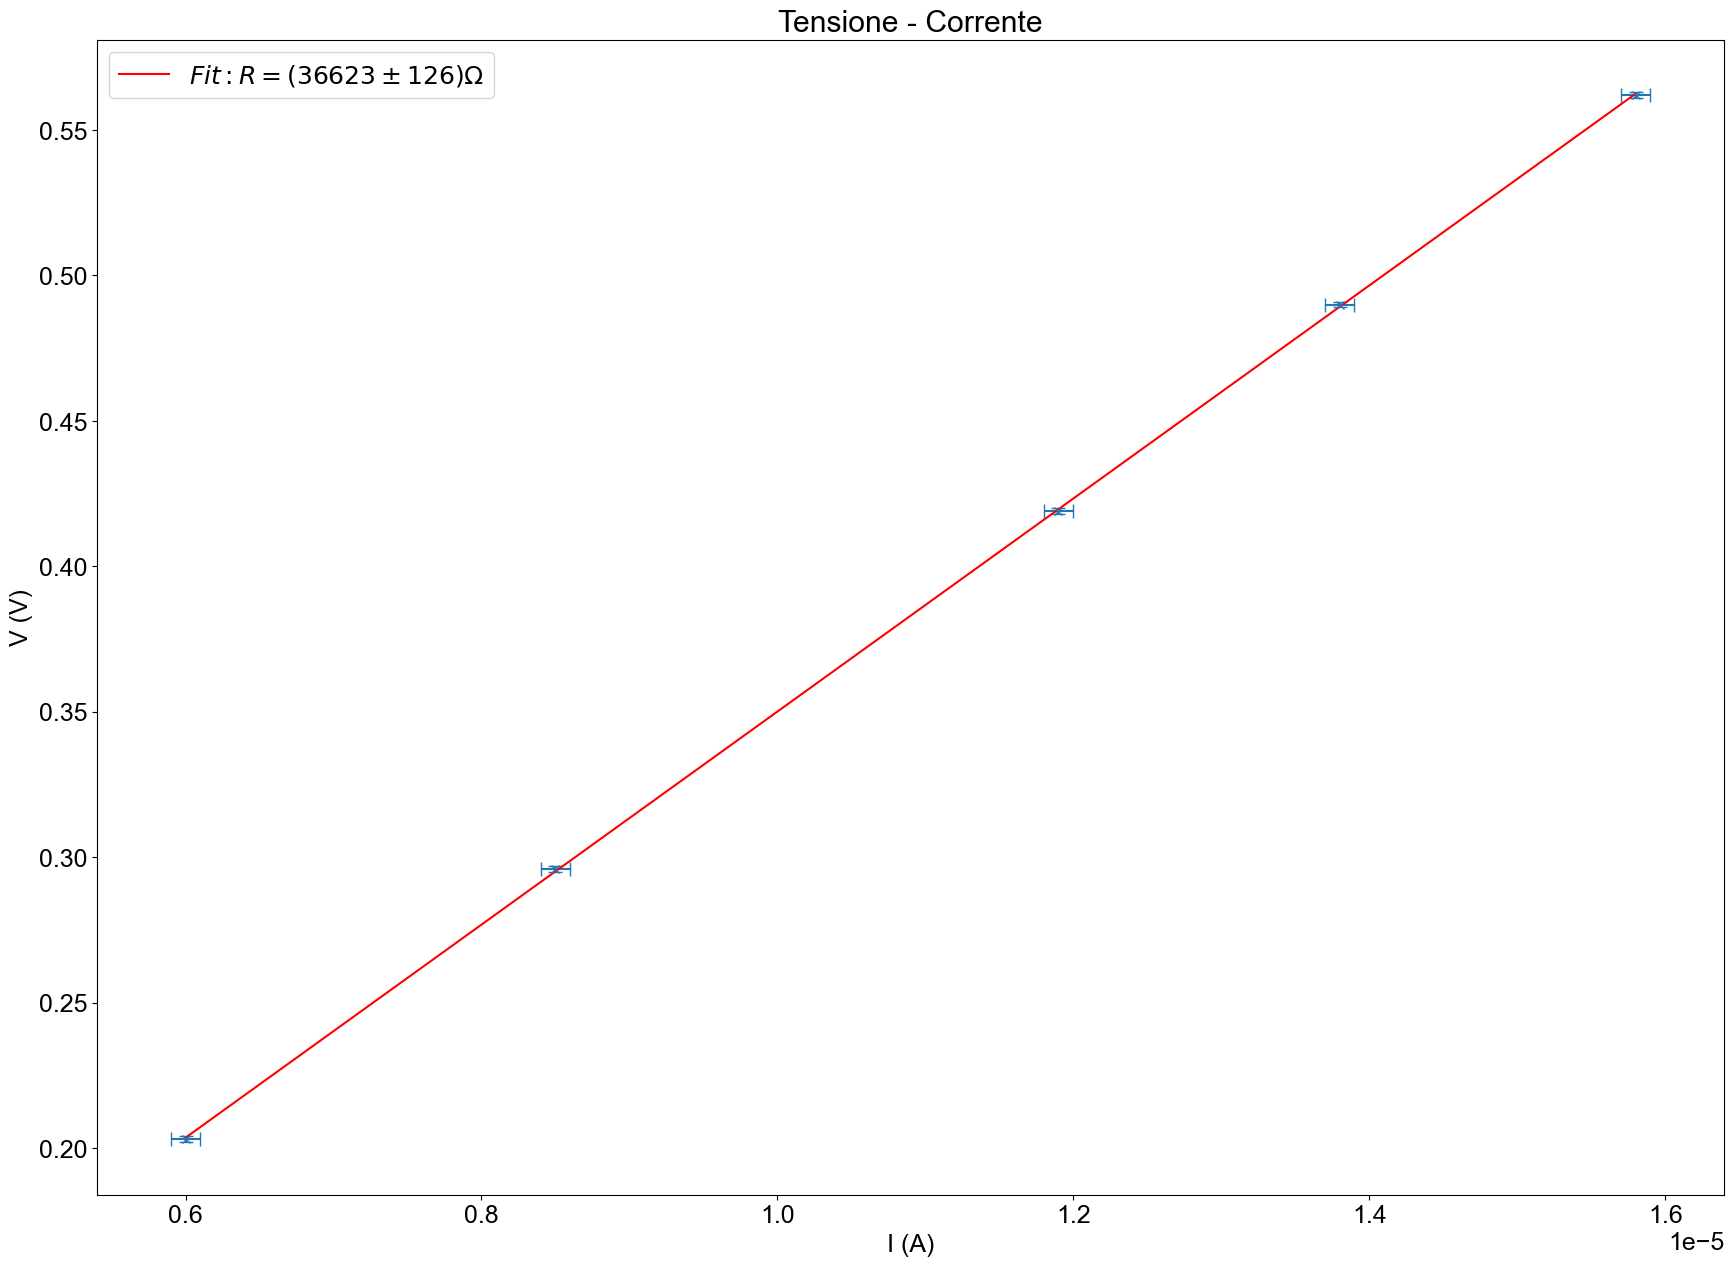

Chi2=2.322
Prob=50.824%


In [36]:
#Fare fit e confrontare con valore atteso (in Serie)
data_serie = pd.read_csv("data/parte_uno/resistenze_serie.csv")

V_s = data_serie["V[V]"].values
I_s = data_serie["I[muA]"].values / 1000000
sigma_V_s = data_serie["sigma_V[V]"].values
sigma_I_s = data_serie["sigma_I[muA]"].values / 1000000 # Convert microamps to amps

popt_s, pcov_s = curve_fit(linear_fit, I_s, V_s, sigma=sigma_V_s, absolute_sigma=True)

R_eq_s = popt_s[0]
delta_R_s = pcov_s[0, 0]**0.5
intercept_s = popt_s[1]

fit_line_s = linear_fit(I_s, R_eq_s, intercept_s)

dof_ohm_s = len(V_s)-2
chi_sq_ohm_s , prob_ohm_s = lu.chi2_fit_test(fit_line_s, V_s, sigma_V_s, dof_ohm_s)

plt.errorbar(I_s, V_s, xerr=sigma_I_s, yerr=sigma_V_s, fmt="x")
label_ohm_s = r"$" + f"Fit: R= ({R_eq_s:.0f}" + r"\pm" + f"{delta_R_s:.0f})" + r"\Omega$"
plt.plot(I_s, fit_line_s, color="red", label=label_ohm_s)
plt.xlabel("I (A)")
plt.ylabel("V (V)")
plt.title("Tensione - Corrente")
plt.legend()
plt.show()

print(f"Chi2={chi_sq_ohm_s:.3f}")
print(f"Prob={prob_ohm_s*100:.3f}%")

In [37]:
#Valore atteso
R_eq_atteso_s = R_1 + R_2
print(R_eq_atteso_s)

#using Funnel
R_eq_att_s = Routine("R_1 + R_2")
R_eq_att_funnel_s = FunnelSingle((['R_1', 'R_2'],[R_1, R_2],['s_R_1', 's_R_2'],[sigma_Rs, sigma_Rs]), R_eq_att_s)
R_eq_att_funnel_s.prepare_data()
R_eq_atteso_s, R_eq_atteso_error_s, R_eq_atteso_error_formula_s = R_eq_att_funnel_s.run_routine()
print(f"R_eq_atteso={R_eq_atteso_s:.3f} +- {R_eq_atteso_error_s:.3f}Ohm")
print(R_eq_atteso_error_formula_s)

36560.0
R_eq_atteso=36560.000 +- 4.472Ohm
\sigma_{R_1R_1} + \sigma_{R_2R_2}


## Parte due

In [17]:
R_load_1 = 468.2e3
R_load_2 = 466.0e3

## Parte tre

In [18]:
def shockley_fun(V, I_0, g, T):
    q=1.6e-19
    k=1.38e-23
    return I_0 * (np.exp((q*V)/(k*g*T))-1)


In [19]:
def dummy_shockley_fun(V, I_0, g):
    q=1.6e-19
    k=1.38e-23
    T = 300
    return I_0 * (np.exp((q*V)/(k*g*T))-1)


In [20]:
#Calcola derivate tra coppie valori per trovare resistenza diodo in quell'intervallo
dati_diodo = pd.read_csv("data/parte_tre/misure_diodo.csv")
V_ds = dati_diodo['V[V]'].to_list()
V_ds_error = dati_diodo['sigma_V[V]'].to_list()
I_ds = dati_diodo['I[muA]'].to_list()
I_ds = [i_d / 1000000 for i_d in I_ds]
I_ds_error = dati_diodo['sigma_I[muA]'].to_list()
I_ds_error = [I_ds_err / 1000000 for I_ds_err in I_ds_error]

R_diodo = [(V_ds[i+1]-V_ds[i]) / (I_ds[i+1] - I_ds[i]) for i in range(6, len(V_ds)-1)]

In [21]:
#dummy fit with T set as 300k to find initial guess values for I_0 and g
dummy_popt_d, dummy_pcov_d = curve_fit(dummy_shockley_fun, V_ds, I_ds, sigma=I_ds_error, absolute_sigma=True, maxfev=5000, p0=[0.1, 1])
initial_I0, initial_g = dummy_popt_d

3.1642257241280173e-10 1.5840697797371497 299.9700689132184
[136.6906474820142, 49.350649350649405, 36.92307692307695, 29.545454545454582, 19.11764705882354, 14.9122807017544, 8.695652173913052, 6.614785992217861, 3.921568627450984, 3.5634743875278434, 1.6509433962264164, 2.1951219512195146, 1.2500000000000016, 0.9523809523809529, 0.7643312101910839, 0.748299319727892, 0.5142857142857147, 0.45936395759717347, 0.1973094170403584, 0.441176470588236, 0.1012658227848102]


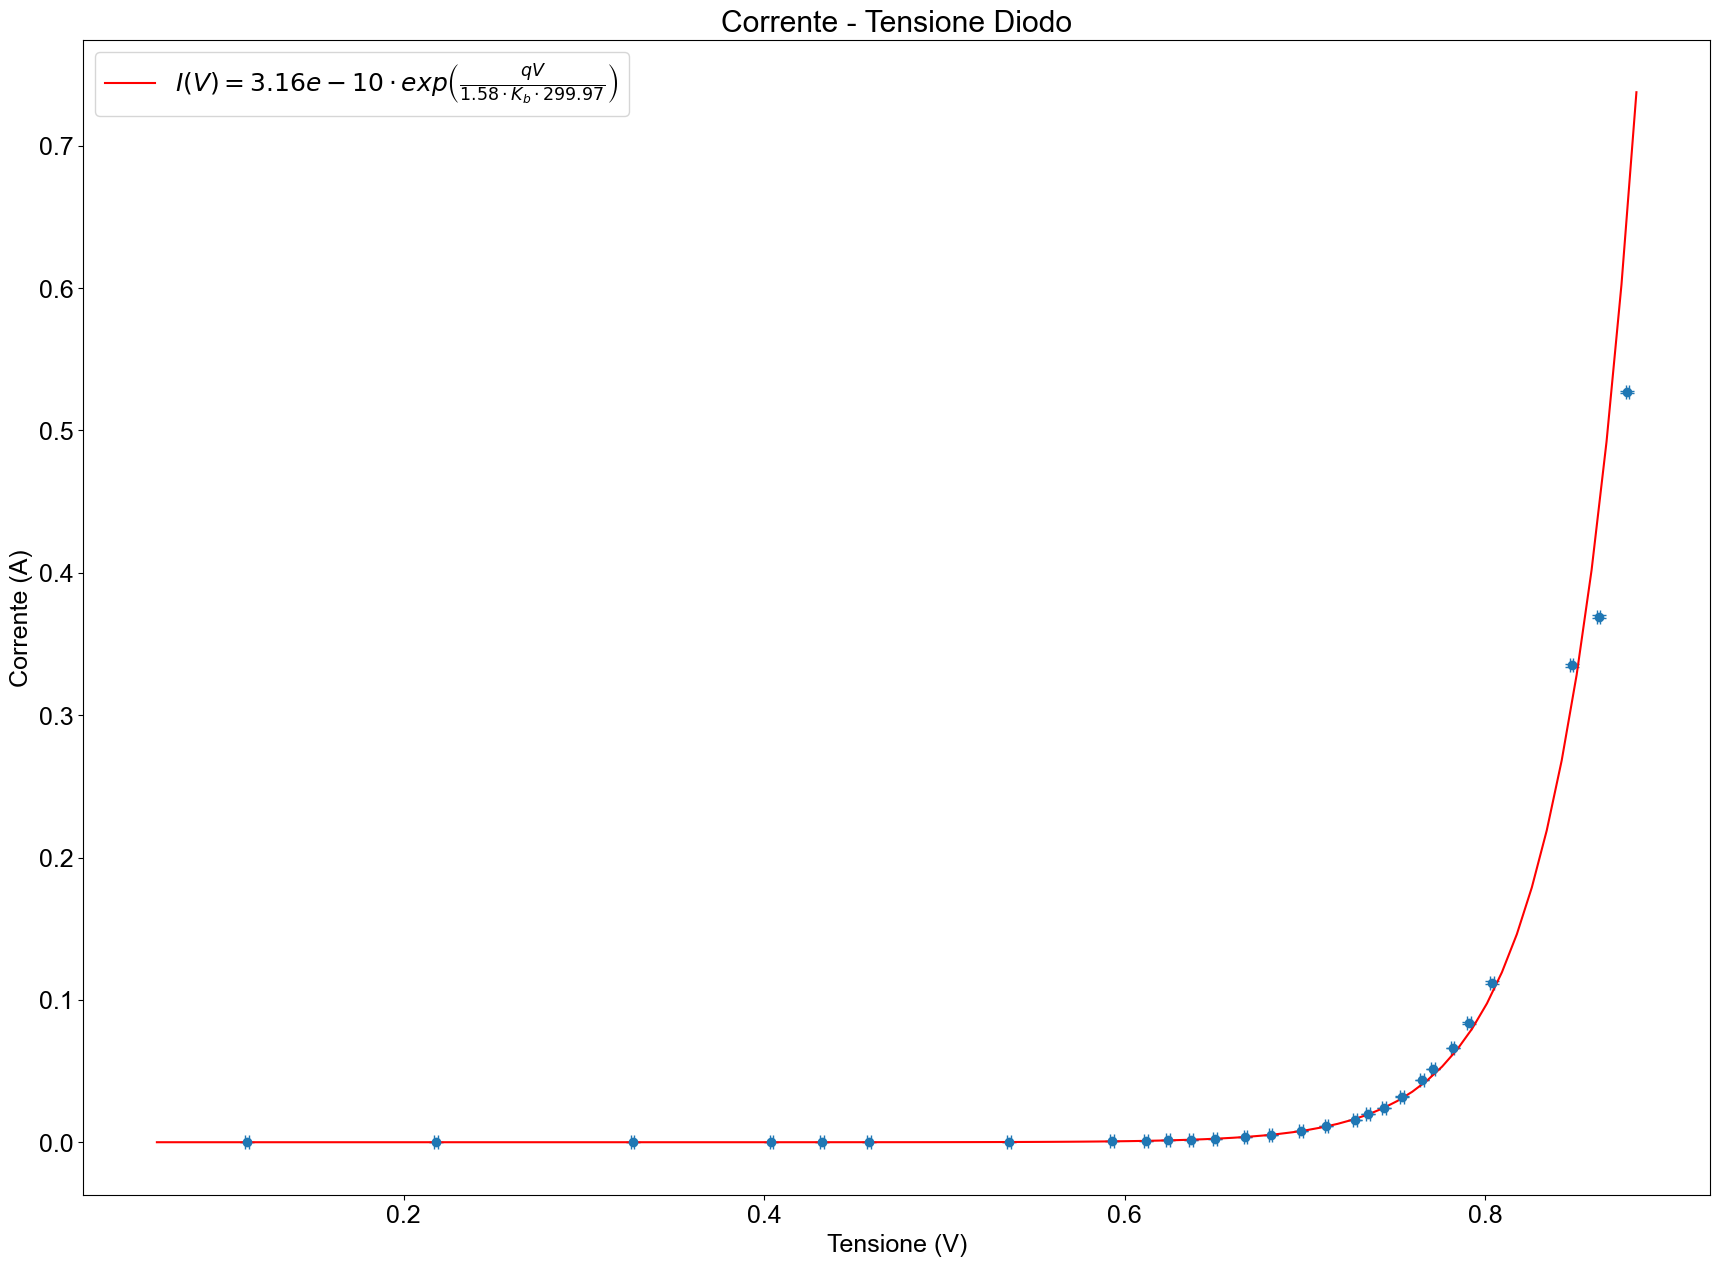

In [22]:
#Fit
p0 = [initial_I0, initial_g , 300] #Initial parameter guess
popt_d, pcov_d = curve_fit(shockley_fun, V_ds, I_ds, sigma=I_ds_error, absolute_sigma=True, maxfev=5000, p0=p0)

I_0 = popt_d[0]
g = popt_d[1]
T = popt_d[2]
print(I_0,g, T)

V_Shockley = np.linspace(min(V_ds)-0.05, max(V_ds)+0.005, 100)
I_Shockley = shockley_fun(V_Shockley, I_0, g, T)

plt.errorbar(V_ds, I_ds, xerr=V_ds_error, yerr=I_ds_error, fmt="o")
shockley_lable = r'$I(V) = ' + str("{:.2e}".format(I_0)) + r'\cdot exp\left(\frac{qV}{' + str(round(g,2)) + r'\cdot K_b \cdot' + str(round(T,2)) + r'}\right)$'
plt.plot(V_Shockley, I_Shockley, color="red", label=shockley_lable)
plt.title("Corrente - Tensione Diodo")
plt.xlabel("Tensione (V)")
plt.ylabel("Corrente (A)")
plt.legend()
print(R_diodo)

In [40]:
#calculate chi2
dof_diodo = len(V_ds)-3
I_s_hyp = [shockley_fun(V_ds[i], I_0, g, T) for i in range(len(V_ds))]
chi_sq_diodo, prob_diodo = lu.chi2_fit_test(I_s_hyp, I_ds, I_ds_error, dof_diodo)
print(f"Chi2={chi_sq_diodo:.3f}")
print(f"Prob={prob_diodo*100:.3f}%")

Chi2=48796.315
Prob=0.000%


Ora proviamo a fittare linearmente le ultime parti del grafico

In [23]:
def plot_linear_fits(current, voltage, current_err, voltage_err, N, m, stop):
    fig, ax = plt.subplots()
    
    # plot the data points
    ax.errorbar(current[10::], voltage[10::], xerr=current_err[10::], yerr=voltage_err[10::], fmt='.', color='blue')

    
    # iterate through the data starting from N and incrementing by m
    for i in range(N, stop, m):
        x_fit = current[i:] # use data starting from index i
        y_fit = voltage[i:]
        x_err = current_err[i:]
        y_err = voltage_err[i:]
        
        # perform a linear fit on the data using curve_fit from scipy
        fit_params, _ = curve_fit(linear_fit, x_fit, y_fit, sigma=y_err, absolute_sigma=True)
        
        #Calculate chi2
        hyps = [linear_fit(x, fit_params[0], fit_params[1]) for x in x_fit]
        dof = len(y_fit) - 2
        chi2, prob = lu.chi2_fit_test(hyps, y_fit, y_err, dof)
        # plot the fitted line
        x_plot = np.linspace(x_fit[0]-0.01, x_fit[-1]+0.01, num=100)
        label = r'$\chi^2 = ' + f'{chi2:.0f}' + r' \;|\; V_{min} = ' + f'{x_fit[0]:.2f}' + r'$'
        ax.plot(x_plot, linear_fit(x_plot, fit_params[0], fit_params[1]), label=label)
    
    ax.set_xlabel('Corrente (A)')
    ax.set_ylabel('Tensione (V)')
    ax.legend()
    ax.set_title('Tensione - Corrente Diodo')
    plt.show()

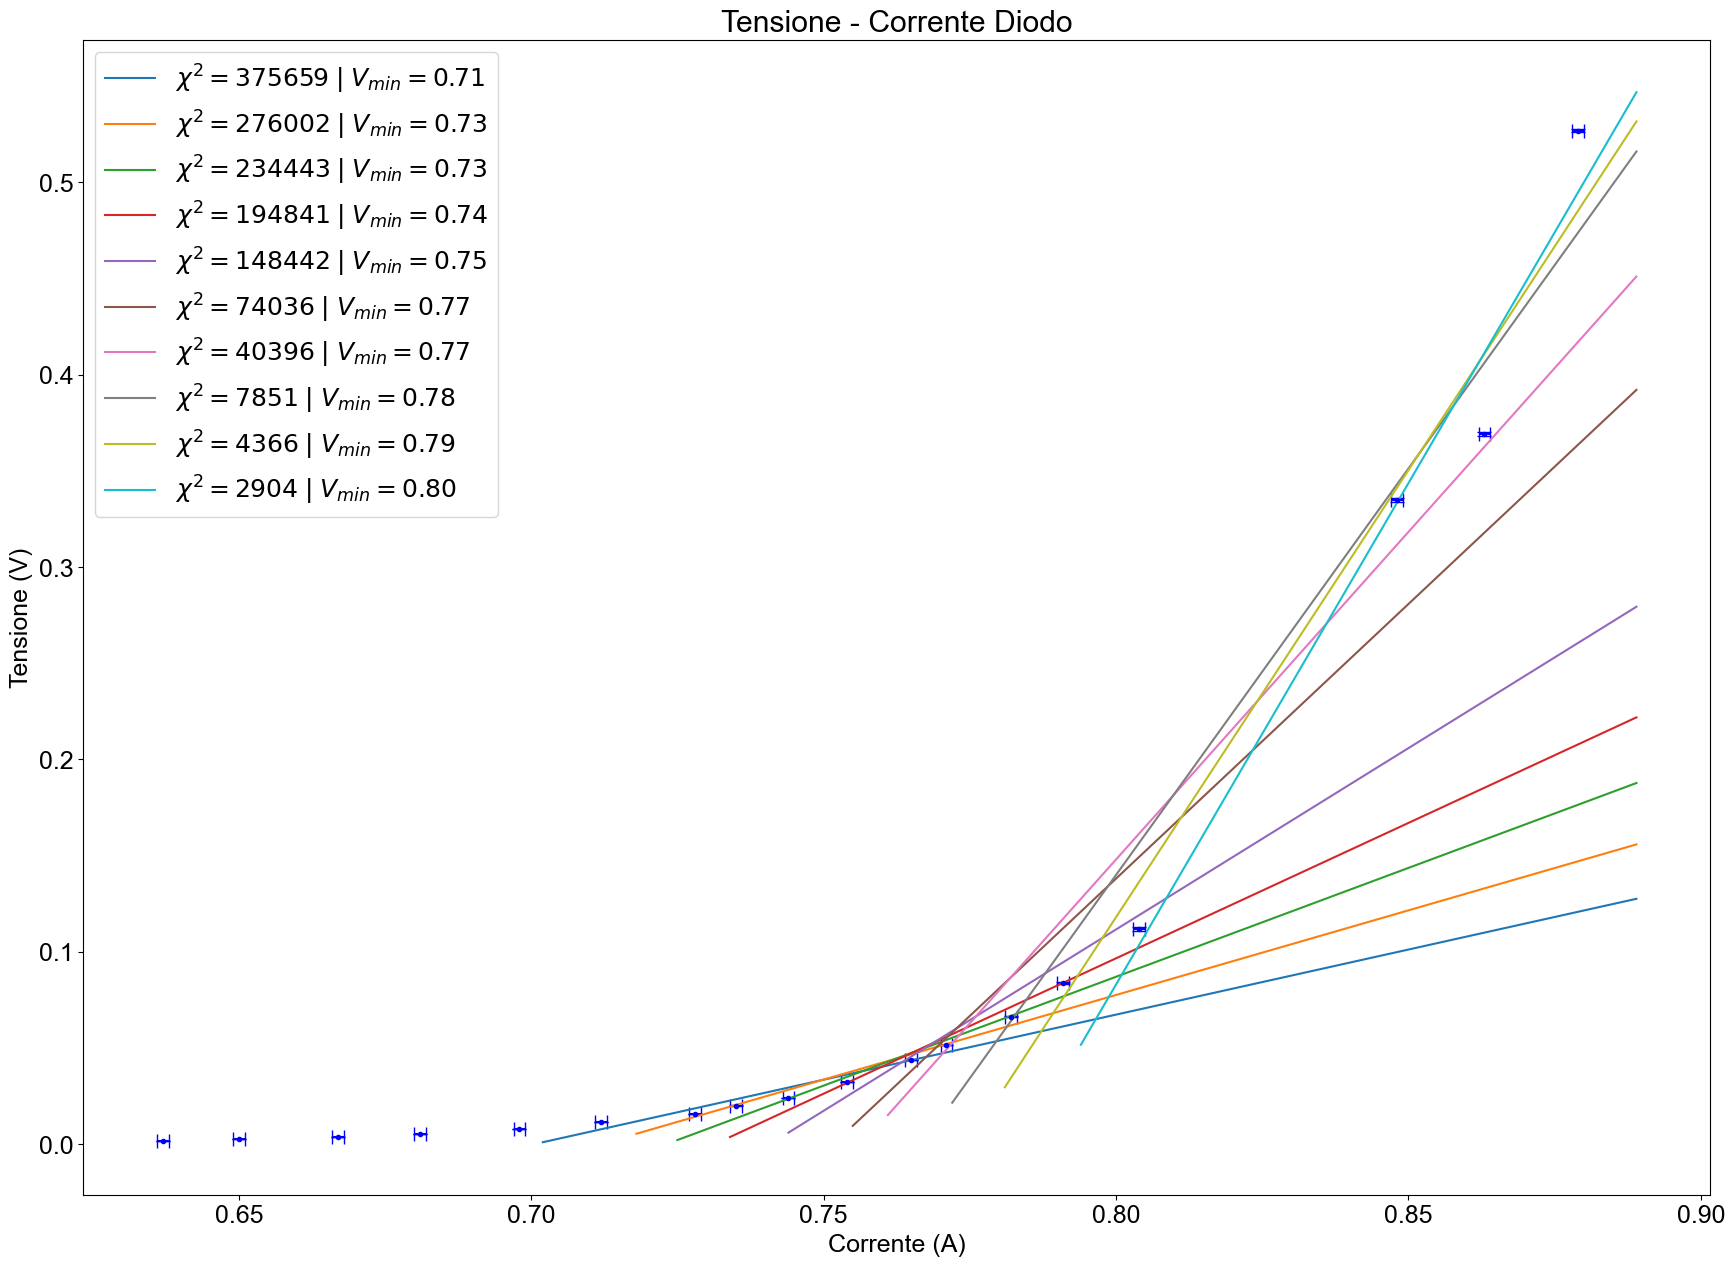

In [24]:
plot_linear_fits(V_ds, I_ds, V_ds_error, I_ds_error, 15, 1, len(V_ds) - 3)